In [1]:
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# import yfinance as yf   data can be imported using yf



In [2]:
df = pd.read_csv("Adani_Power.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,32.500000,34.400002,32.299999,34.000000,34.000000,12331921
1,2016-01-04,34.000000,34.700001,32.000000,32.700001,32.700001,15329003
2,2016-01-05,32.849998,34.599998,32.849998,34.299999,34.299999,12091589
3,2016-01-06,34.549999,35.150002,33.599998,34.500000,34.500000,12298429
4,2016-01-07,33.799999,33.799999,31.299999,32.000000,32.000000,10495393


([<matplotlib.axis.XTick at 0x1e260e89910>], [Text(1975.0, 0, ' ')])

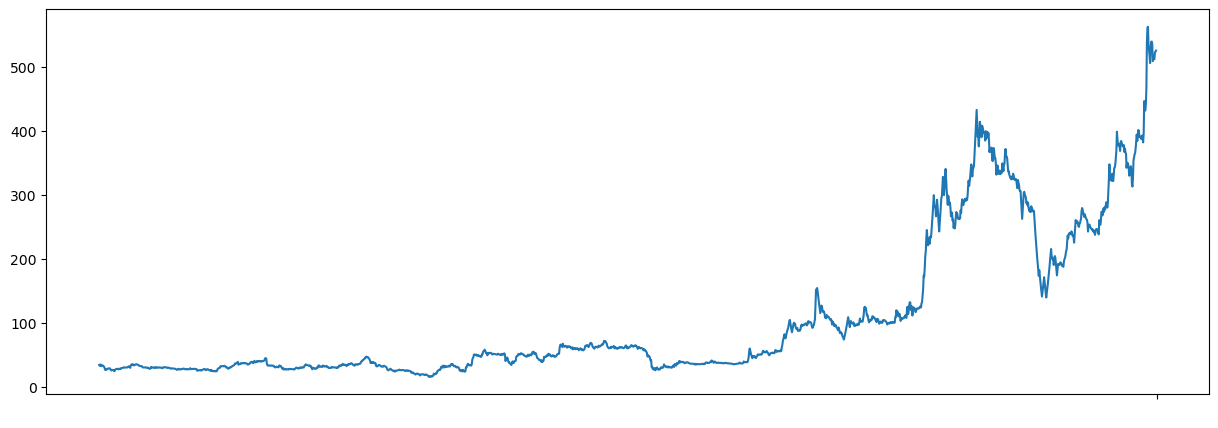

In [20]:
plt.figure(figsize=(15,5))
plt.plot(df.Date, df.Close)
# plt.xlabel('date')
plt.xticks(' ')


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM, GRU #can train using either GRU or LSTM

from sklearn.preprocessing import StandardScaler

In [5]:
# convert the Date column to DateTime from Object type
train_set_dates = pd.to_datetime(df['Date'])
train_set_dates.head()

# extract the required features (in this we are omiting the volume from feature list)
columns = list(df.columns[1:6])
print(columns)

df_train = df[columns].astype(float)
df_train.head()

# Normalize the data using the Standard scaler
standard_scaler = StandardScaler()
scalar = standard_scaler.fit(df_train)
scaled_training_df = scalar.transform(df_train)

['Open', 'High', 'Low', 'Close', 'Adj Close']


In [6]:
trainX = []
trainY = []

future_no_of_days = 1 # num of days to predict the future values
past_no_of_days = 14 # number of days on which the prediction is computed

for i in range(past_no_of_days, len(scaled_training_df) - future_no_of_days+1):
    trainX.append(scaled_training_df[i - past_no_of_days:i, 0:df_train.shape[1]])
    trainY.append(scaled_training_df[i + future_no_of_days - 1:i + future_no_of_days, 0])
    
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape: {}'.format(trainX.shape))
print('trainY shape: {}'.format(trainY.shape))

trainX shape: (1961, 14, 5)
trainY shape: (1961, 1)


In [7]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 14, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.1549 - val_loss: 0.0834
Epoch 2/500
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0337 - val_loss: 0.0380
Epoch 3/500
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0253 - val_loss: 0.0869
Epoch 4/500
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0222 - val_loss: 0.0273
Epoch 5/500
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0311 - val_loss: 0.0702
Epoch 6/500
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0229 - val_loss: 0.0976
Epoch 7/500
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0195 - val_loss: 0.0454
Epoch 8/500
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0216 - val_loss: 0.0349
Epoch 9/500
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0209 - val_loss: 0.0922
Epoch 10/500
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0163 - val_loss: 0.0353
Epoch 11/500
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0154 - val_loss: 0.0265
Epoch 12/500
111/111 ━━━━━━━━━━━━━━━━━━━

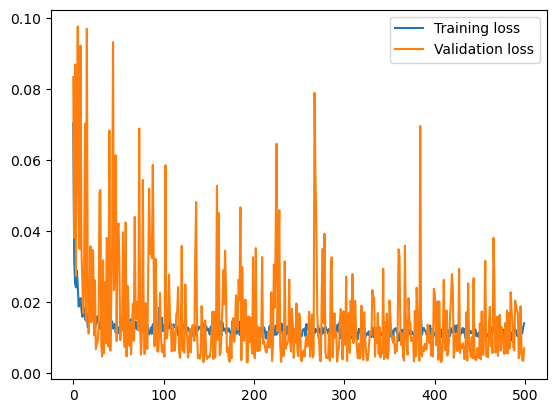

In [8]:
# fit the model
history = model.fit(trainX, trainY, epochs=500, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [9]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_past = 90
n_days_for_prediction=90  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_set_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist() # instead of us_bd we can give '1d' etc.

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

# predict the future price
prediction_copies = np.repeat(prediction, df_train.shape[1], axis=-1)
y_pred_future = scalar.inverse_transform(prediction_copies)[:,0]

# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2023-1-1'] # selecting the data only from 2023 just for our convinence


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step


C:\Users\bnaga\AppData\Local\Temp\ipykernel_8904\3367850894.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

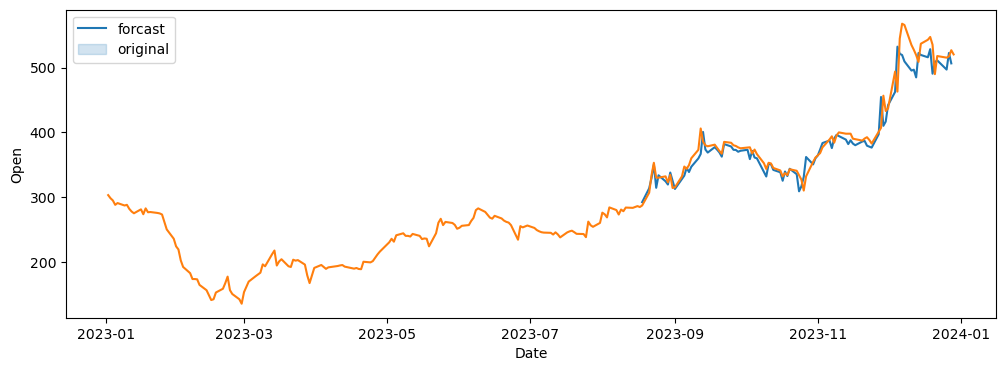

In [10]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df_forecast, x='Date', y='Open')
sns.lineplot(data=original, x='Date', y='Open')
plt.legend(["forcast", "original"])
plt.show()